#### Import the essential librairies such numpy, plot, sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

##### Load the Iris flowers dataset And prepare the dataFrame

In [2]:
dataset = load_iris()

In [3]:
features, targets = dataset.data, dataset.target
dataset.feature_names.append("category")
names=dataset.feature_names

In [ ]:
dataset = pd.concat([pd.DataFrame(features), pd.Series(targets)], axis=1, columns=names );dataset.columns = names

In [5]:
dataset.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),category
60,5.0,2.0,3.5,1.0,1
101,5.8,2.7,5.1,1.9,2
32,5.2,4.1,1.5,0.1,0


In [6]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),category
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


_Il n'y a aucune varible qui contient des donnes manquantes: pas besion  de 'fillNaN'_
-   Pour chaque variable le minimun est inferieur a 10, chose interressante car nous pouvons essayer des models sans forcement passer d'aborb par de la standardisation ou de la Scalerisation de variables.
-   L'ecart type de toutes les variables est tres negligeable, chose tres rare, mais comprehensible vu le fait que les donnes dans l'ensemeble ont un minumum proche de zero et un maximum <= 8;
-   La variable "category" qui reprensente la category de la plante ici, semble ne pas avoir trop d'impact sur notre problem present, mais nous l'inclueront dans nos premiers model pour voir a quoi il va ressembler.

#### Check for dataset data types and visualize them depending on the target

In [7]:
target, features = dataset["sepal length (cm)"], dataset.drop("sepal length (cm)", axis=1)

In [8]:
features.dtypes, target.dtypes

(sepal width (cm)     float64
 petal length (cm)    float64
 petal width (cm)     float64
 category               int64
 dtype: object,
 dtype('float64'))

**Toutes nos variables sont de type entiers** <br>
Pas besion de faire de la conversion des en cas de variable qualitative.


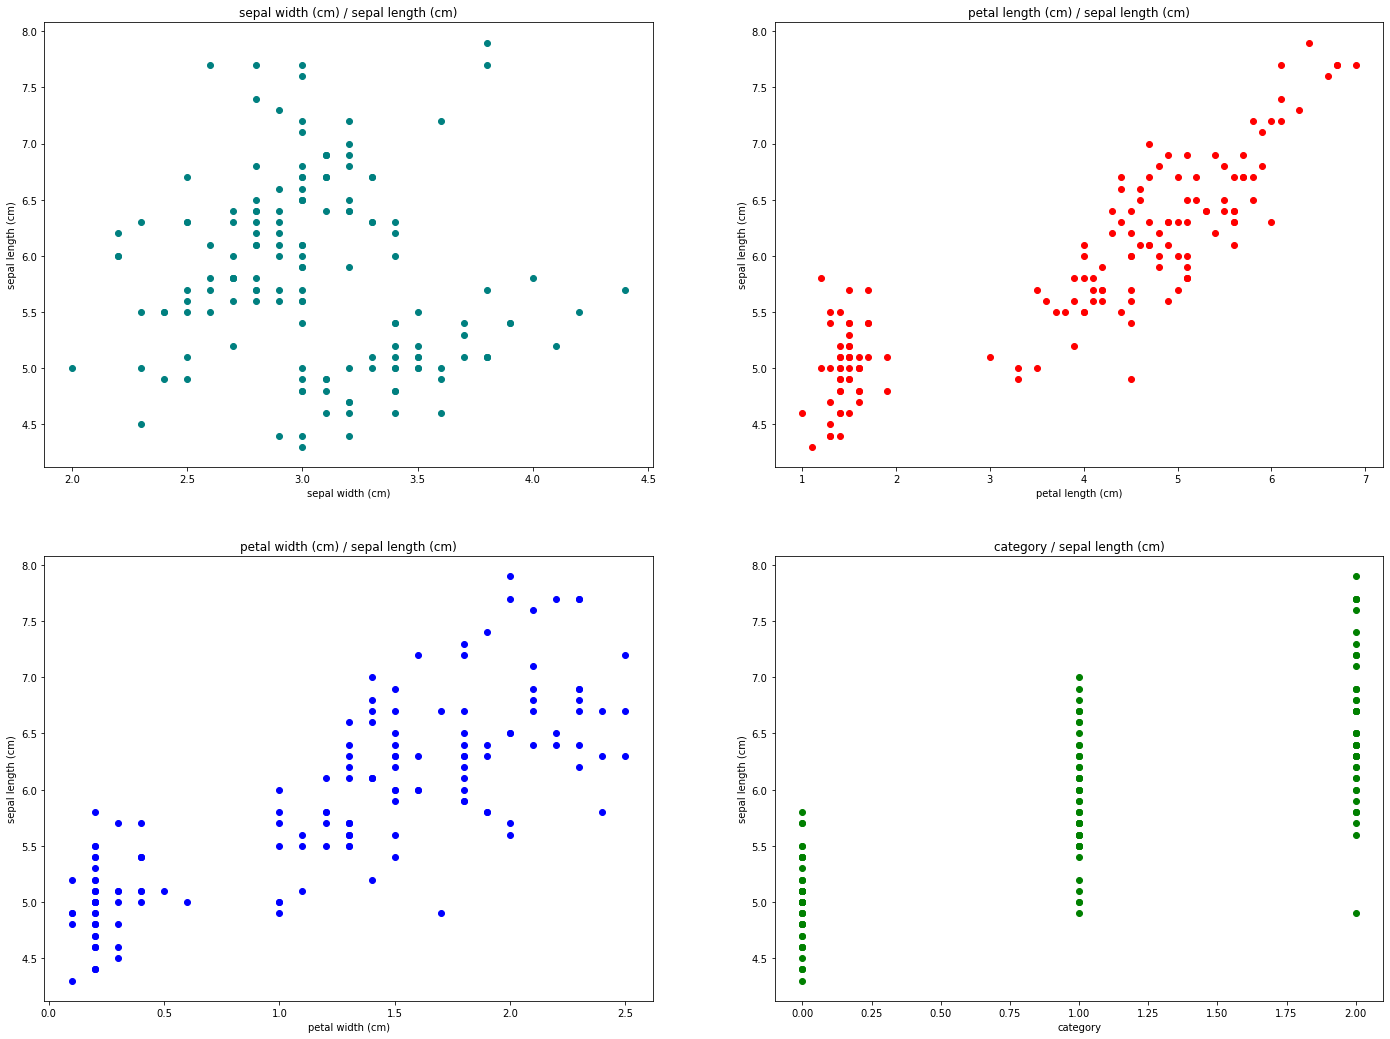

In [9]:
colors = ["teal", "red", "blue", "green" ]
plt.figure(figsize=(24, 18))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.scatter(features[features.columns[i]], target, c=colors[i])
    plt.title(f"{features.columns[i]} / {target.name}")
    plt.xlabel(f"{features.columns[i]}")
    plt.ylabel(f"{target.name}")
#     plt.legend()
# plt.show()
    

###### A voir le Plot ci-dessus on peut dire:
- **En ce qui concerne la longueur du sepal;** _Il n'y a pas de tres grande distrubtion entre longueur et la largeur du sepal_: 
    - c'est-a-dire que la distrution est aleatoire et on ne pourait pas etablir une relation entre la longueur et la largeur du sepal.
    - Neamoins, on vois que la taille du sepal augment pour les fleurs dont la longueur du sepal est compris entre __2.5cm et 3.5cm__ . Ce fait pourrait nous interresse pour plutard

- **En ce qui concerne la largeur du petal; on voit une certaine correlation**:
    - En effet **30% a 40%** des fleurs ont une largeur de sepal compris entre **4.0cm et 6.0cm**
    - Le reste des fleur, c'est a dire plus de **55%** correlent avec la largeur de sepal
    
- **En ce qui concerne la longueur du petal:**
     - Ils ont presque la meme corelation que la __largeur du petal__ car pres de **30 a 40%** sont stack a une largeur compris entre **4.5 et 6.0cm**
     - Le reste des fleurs sont elles aussi en correlation avec la largeur du sepal
     - Ce qui constitue une difference entre la largeur et la longueur du sepal, c'est la dispersion des element qui les constitue. On voit au niveau de la longueur que les fleurs sont **"sparse"** contrairement aux autres
     
- **En ce qui concerne les category:**
    - Il n'y a pas de relation. Donc, nous verrons cela comme feature a analyser plutard.

- **Parceque le dataset est de taille minume, nous allons vite passer au modeling voir, si on peut composer quelque chose avant de revenir voir si nous n'avons pas omis d'explorer quelque chose d'autre**

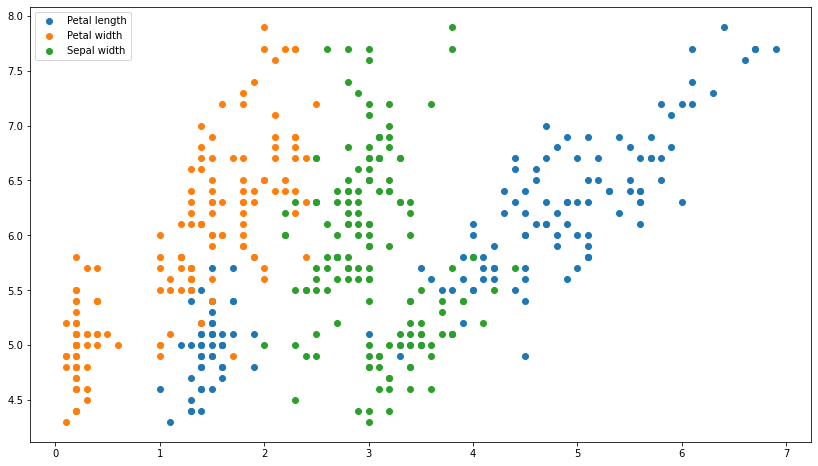

In [10]:
## Visualisons le width et le height du sepal pour voir a quoi ca ressemble
plt.figure(figsize=(14,8))
plt.scatter(features["petal length (cm)"], target, label="Petal length")
plt.scatter(features["petal width (cm)"],target, label="Petal width")
plt.scatter(features["sepal width (cm)"],target, label="Sepal width")
plt.legend()

**Ce plot est tres explicit, car il revele la correltion qui existe entre toutes les variables numeriques et la variable d'arrive. On presumer que notre model si il est construit , fera une bonne performance a cause des correlations.**

La variable **Petal Length** est u peu ambigue et peut causer notre model a avoir de mauvais score car sa  distribution est un peu categoricielle

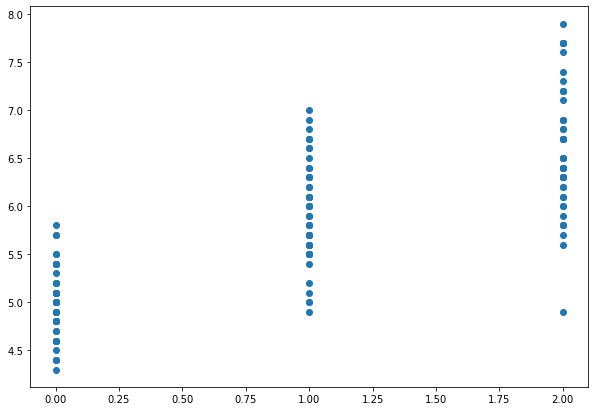

In [13]:
### Voyons voir si en fonction de  la ategorie on peut determiner la largeur du sepal
plt.figure(figsize=(10,7))
plt.scatter(features.category, target)


Les donnees  de la variable category, ne joue pas trop sur la largeur du sepal car , elles sont entremelles et on ne pourrait meme faire du **treeRegressor**